In [1]:
import pandas as pd


df = pd.read_csv("Creditcard_data.csv")

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape


(772, 31)

In [3]:
df['Class'].value_counts()


,count
Class,
0,763
1,9


In [4]:
X = df.drop('Class', axis=1)
y = df['Class']


In [5]:
!pip install imbalanced-learn


In [6]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = rus.fit_resample(X, y)


balanced_df = pd.concat(
    [pd.DataFrame(X_balanced, columns=X.columns),
     pd.Series(y_balanced, name='Class')],
    axis=1
)

balanced_df['Class'].value_counts()


,count
Class,
0,9
1,9


In [7]:
balanced_df.to_csv("balanced_creditcard_data.csv", index=False)


In [9]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [10]:
balanced_df = pd.read_csv("balanced_creditcard_data.csv")

X_bal = balanced_df.drop("Class", axis=1)
y_bal = balanced_df["Class"]


In [11]:
samples = {}

# Sampling 1: Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X1, y1 = rus.fit_resample(X_bal, y_bal)
samples["Sampling1"] = (X1, y1)

# Sampling 2: Random Over Sampling
ros = RandomOverSampler(random_state=42)
X2, y2 = ros.fit_resample(X_bal, y_bal)
samples["Sampling2"] = (X2, y2)

# Sampling 3: SMOTE
smote = SMOTE(random_state=42)
X3, y3 = smote.fit_resample(X_bal, y_bal)
samples["Sampling3"] = (X3, y3)

# Sampling 4: NearMiss
nearmiss = NearMiss()
X4, y4 = nearmiss.fit_resample(X_bal, y_bal)
samples["Sampling4"] = (X4, y4)

# Sampling 5: Tomek Links
tomek = TomekLinks()
X5, y5 = tomek.fit_resample(X_bal, y_bal)
samples["Sampling5"] = (X5, y5)


In [12]:
for key, (X_s, y_s) in samples.items():
    print(key, y_s.value_counts().to_dict())


Sampling1 {0: 9, 1: 9}
Sampling2 {0: 9, 1: 9}
Sampling3 {0: 9, 1: 9}
Sampling4 {0: 9, 1: 9}
Sampling5 {0: 9, 1: 6}


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [14]:
models = {
    "M1_LogisticRegression": LogisticRegression(max_iter=1000),
    "M2_KNN": KNeighborsClassifier(),
    "M3_DecisionTree": DecisionTreeClassifier(random_state=42),
    "M4_RandomForest": RandomForestClassifier(random_state=42),
    "M5_SVM": SVC()
}


In [15]:
results = []

for sampling_name, (X_s, y_s) in samples.items():

    X_train, X_test, y_train, y_test = train_test_split(
        X_s, y_s, test_size=0.3, random_state=42, stratify=y_s
    )

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        results.append({
            "Sampling": sampling_name,
            "Model": model_name,
            "Accuracy": round(acc * 100, 2)
        })


In [16]:
results_df = pd.DataFrame(results)
results_df


,Sampling,Model,Accuracy
0,Sampling1,M1_LogisticRegression,66.67
1,Sampling1,M2_KNN,66.67
2,Sampling1,M3_DecisionTree,83.33
3,Sampling1,M4_RandomForest,50.00
4,Sampling1,M5_SVM,66.67
5,Sampling2,M1_LogisticRegression,33.33
6,Sampling2,M2_KNN,66.67
7,Sampling2,M3_DecisionTree,66.67
8,Sampling2,M4_RandomForest,50.00
9,Sampling2,M5_SVM,66.67


In [17]:
pivot_table = results_df.pivot(
    index="Model",
    columns="Sampling",
    values="Accuracy"
)

pivot_table


Sampling,Sampling1,Sampling2,Sampling3,Sampling4,Sampling5
Model,,,,,
M1_LogisticRegression,66.67,33.33,33.33,66.67,40.0
M2_KNN,66.67,66.67,66.67,50.00,60.0
M3_DecisionTree,83.33,66.67,66.67,66.67,100.0
M4_RandomForest,50.00,50.00,50.00,50.00,60.0
M5_SVM,66.67,66.67,66.67,50.00,60.0


In [18]:
pivot_table.to_csv("sampling_model_accuracy.csv")


In [19]:
best_sampling_per_model = pivot_table.idxmax(axis=1)
best_accuracy_per_model = pivot_table.max(axis=1)

best_df = pd.DataFrame({
    "Best Sampling Technique": best_sampling_per_model,
    "Best Accuracy (%)": best_accuracy_per_model
})

best_df


,Best Sampling Technique,Best Accuracy (%)
Model,,
M1_LogisticRegression,Sampling1,66.67
M2_KNN,Sampling1,66.67
M3_DecisionTree,Sampling5,100.00
M4_RandomForest,Sampling5,60.00
M5_SVM,Sampling1,66.67


In [20]:
best_overall = pivot_table.stack().idxmax()
best_overall_accuracy = pivot_table.stack().max()

best_overall, best_overall_accuracy


(('M3_DecisionTree', 'Sampling5'), 100.0)

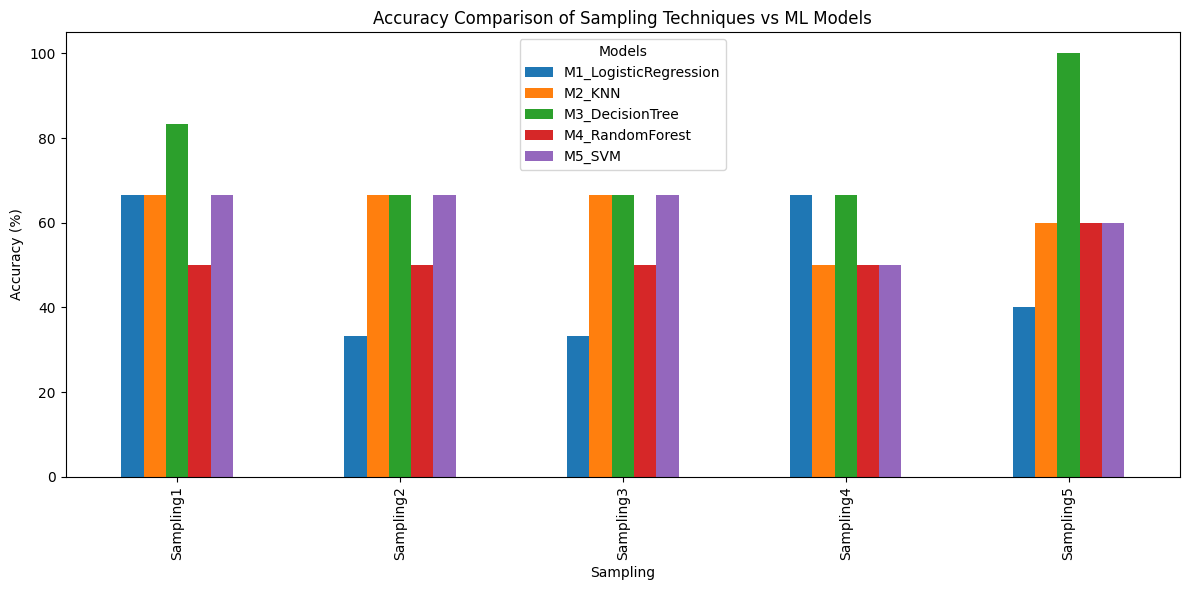

In [21]:
import matplotlib.pyplot as plt

pivot_table.T.plot(kind='bar', figsize=(12,6))
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Sampling Techniques vs ML Models")
plt.legend(title="Models")
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

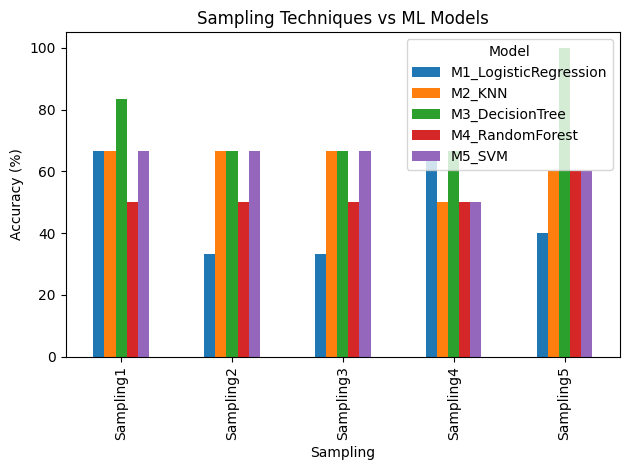

In [22]:
plt.figure(figsize=(12,6))
pivot_table.T.plot(kind='bar')
plt.ylabel("Accuracy (%)")
plt.title("Sampling Techniques vs ML Models")
plt.tight_layout()
plt.savefig("sampling_vs_models.png")
